In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime

%matplotlib inline

In [17]:
start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2020, 10, 1)

df = web.DataReader('unrate', 'fred', start, end)

In [2]:
df = pd.read_csv("power.csv")
df.head()

,D,cum_power,diff
0,2011-10-26,0.1,NaN
1,2011-10-27,10.2,10.1
2,2011-10-28,20.2,10.0
3,2011-10-29,29.6,9.4
4,2011-10-30,34.2,4.6


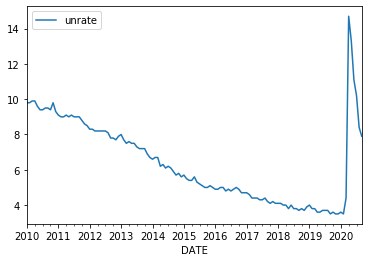

In [12]:
df.plot()

In [5]:
from fbprophet import Prophet


In [6]:
df1 = df[["D", "diff"]]

df1.columns = ["ds", "y"]

m = Prophet()
m.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
df1.head()

,ds,y
0,2011-10-26,NaN
1,2011-10-27,10.1
2,2011-10-28,10.0
3,2011-10-29,9.4
4,2011-10-30,4.6


In [8]:
future = m.make_future_dataframe(periods=365*2)
future.tail()

,ds
3283,2020-10-21
3284,2020-10-22
3285,2020-10-23
3286,2020-10-24
3287,2020-10-25


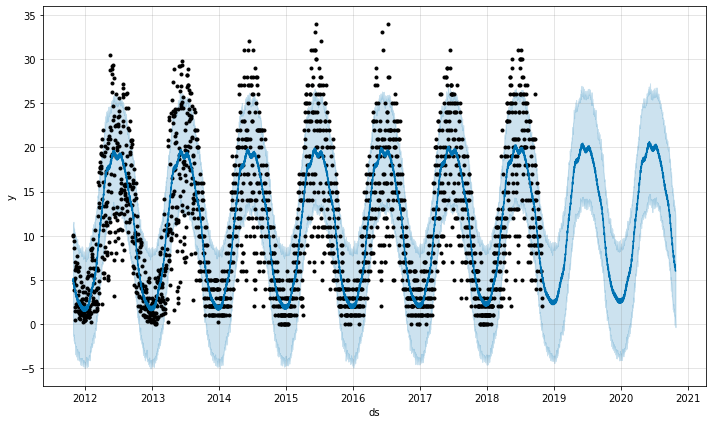

In [9]:
future = m.make_future_dataframe(periods=365*2)
fcst = m.predict(future)
fig = m.plot(fcst)

In [28]:
future

,ds
0,2010-01-01
1,2010-02-01
2,2010-03-01
3,2010-04-01
4,2010-05-01
...,...
136,2021-05-01
137,2021-06-01
138,2021-07-01
139,2021-08-01


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3283,2020-10-21,6.464002,0.115899,12.542488
3284,2020-10-22,6.769404,0.263257,12.859380
3285,2020-10-23,6.679339,1.120138,13.275517
3286,2020-10-24,6.064658,-0.341683,12.275500
3287,2020-10-25,6.027140,-0.179223,12.230095


In [11]:
forecast.set_index("ds", inplace=True)

In [12]:
import plotly.graph_objs as go

def timeseries(df, x, yhat, lower, upper, actual, save = False):

    fig = go.Figure([
        go.Scatter(
            name='Measurement',
            x=df[x],
            y=df['yhat'],
            mode='lines',
            line=dict(color='rgb(31, 119, 180)'),
            showlegend=False
        ),
        go.Scatter(
            name='Upper Bound',
            x=df[x],
            y=df[upper],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False
        ),
        go.Scatter(
            name='Lower Bound',
            x=df[x],
            y=df[lower],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty',
            showlegend=False
        )
    ])
    fig.update_layout(
        yaxis_title='Unemployment Rate',
        title='Unemployment rate estimate using Prophet Forecast',
        hovermode="x"
    )
    fig.add_trace(go.Scatter(x=actual['ds'], y=actual["y"],
                    mode='lines+markers',
                    name='Actual values',
                    showlegend=False))
    fig.show()
    
    if save: 
        fig.write_html("unemployment rate.html")

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

KeyError: "['ds'] not in index"

In [14]:
timeseries(forecast,'ds', 'yhat', 'yhat_lower', 'yhat_upper', actual = df, save = True)

KeyError: 'ds'

In [48]:
df.head()

,index,ds,y
0,0,2010-01-01,9.8
1,1,2010-02-01,9.8
2,2,2010-03-01,9.9
3,3,2010-04-01,9.9
4,4,2010-05-01,9.6


In [94]:
df1 = df = web.DataReader('DHHNGSP', 'fred', start, end)

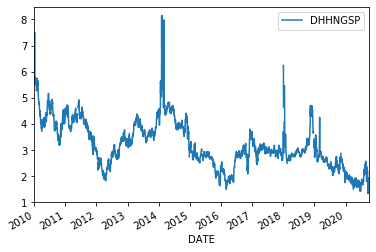

In [95]:
df1.plot()

In [62]:
MPRIME.head()

,MPRIME
DATE,
2010-01-01,3.25
2010-02-01,3.25
2010-03-01,3.25
2010-04-01,3.25
2010-05-01,3.25


In [96]:
df1.reset_index(inplace=True)

df1.columns = ["ds", "y"]

m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


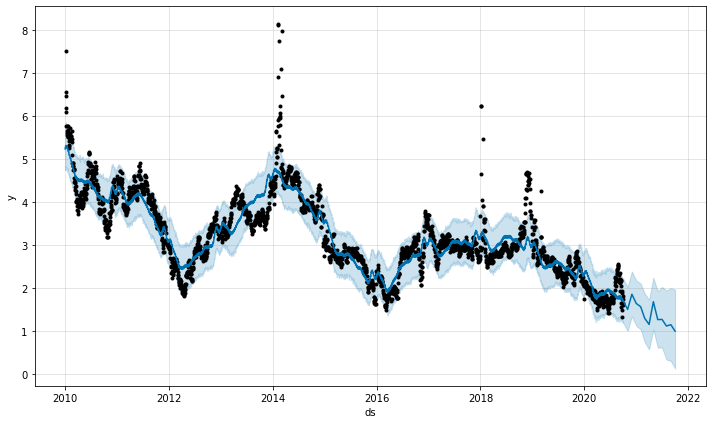

In [97]:
future = m.make_future_dataframe(periods=12, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

In [103]:
def timeseries_trad(df,  y, periods = 10, save = False):
    shift = df.shift(periods=periods, freq="M")
    fig = go.Figure([
        go.Scatter(
            name='Actual values',
            x=df.index, 
            y=df[y],
            mode='lines+markers',
            showlegend=False
        ),
        go.Scatter(
            name='Naive Forecast',
            x=shift.index,
            y=shift[y],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=1),
            showlegend=False
        ),
    ])
    fig.update_layout(
        yaxis_title='price',
        title='Henry Hub Natural Gas Spot Price using Prophet Forecast with shift of {}'.format(periods),
        hovermode="x"
    )
    
    fig.show()
    
    if save: 
        fig.write_html("unemployment rate.html")

In [104]:
timeseries_trad(df1,  "y", periods = 1, save = False)

In [99]:
df1.set_index("ds", inplace=True)

In [107]:
! pip install pmdarima

  Using cached pmdarima-1.7.1.tar.gz (1.1 MB)
  ERROR: Command errored out with exit status 1:
   command: /opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-install-9qh_ly4k/pmdarima/setup.py'"'"'; __file__='"'"'/private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-install-9qh_ly4k/pmdarima/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-wheel-9tc6g76l
       cwd: /private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-install-9qh_ly4k/pmdarima/
  Complete output (68 lines):
  Partial import of pmdarima during the build process.
  Requirements: ['joblib>=0.11', 'Cython>=0.29,<0.29.18', 'numpy>=1.17.3', 'pandas>=0.19', 'scikit-learn>=0.22', 'scipy>=1.3.2', 'statsmodels>=0.11,<0.12

In [106]:
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [15]:
! pip install tsmoothie

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


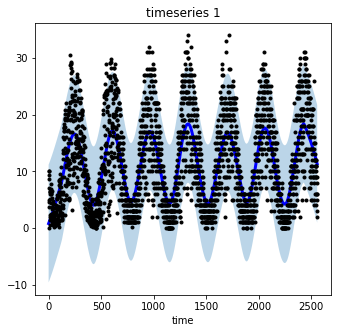

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother



# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(df["diff"])

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

for i in range(1):
    
    plt.subplot(1,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(f"timeseries {i+1}"); plt.xlabel('time')

    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)

In [18]:
df.fillna(0, inplace=True)

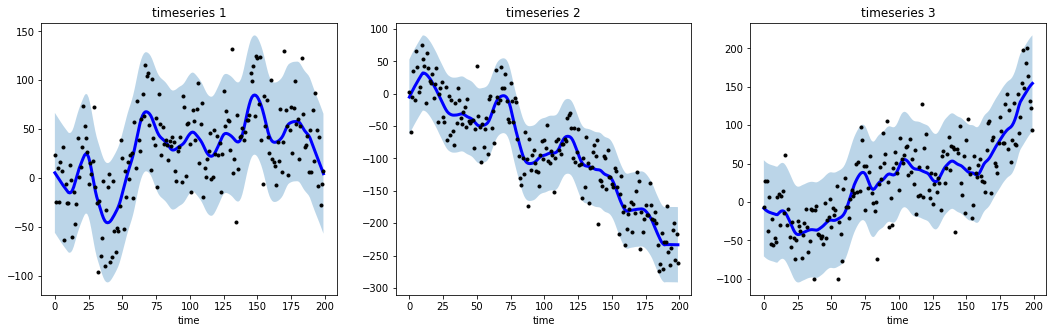

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother

# generate 3 randomwalks of lenght 200
np.random.seed(123)
data = sim_randomwalk(n_series=3, timesteps=200, 
                      process_noise=10, measure_noise=30)

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

for i in range(3):
    
    plt.subplot(1,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(f"timeseries {i+1}"); plt.xlabel('time')

    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)